<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01332636/blob/main/Actividad_Semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Semanal -- 7 Regresiones y K means

##Datos generales
Nombre: Estefania Abigail Castro Belmont

Matrícula: A01332636

Materia: Ciencia y analítica de datos

Profesor: María de la Paz Rico Fernández

Tutor: Julio César Galindo López

Fecha: 09/11/2022

Link: https://github.com/PosgradoMNA/actividades-de-aprendizaje-A01332636/blob/main/Actividad_Semanal_7_Regresiones_y_K_means.ipynb

##Resumen
A través de los siguientes ejercicios podremos explorar las soluciones que nos brinda el análisis de datos en distintos entornos. En los primeros dos ejercicios podemos ver el uso de la regresión lineal simple y multiple, polinomial, el uso de ridge y lasso. Es interesante cómo el análisis de datos puede ayudarnos a comprender a fondo los problemas e inclusive a cambiar nuestra perspectiva sobre los mismos. En el caso de las casas y la manufactura podemos ver la forma en la que las predicciones se comportan con los distintos métodos implementados. El caso que me pareció más interesante es el de target. En muchas ocasiones las empresas se encuentran con problemas que incluyen datos geográficos, este es el caso en la empresa en la que laboro actualmente. El hehco de poder visualizar el mapa y ver la forma en que los datos se agrupan hace que el problema sea mucho más manejable. Los métodos utilizados en cada problema deben ser elegidos de acuerdo al tipo de problema. Las visualizaciones ayudan en buena medida a comprender lo que sucede con la información. Los resultados y el test split nos ayudan a comprender la forma en que el modelo se comporta en los datos. Todas esta herramientas juntas nos permiten realizar mejores análisis de datos, presentarlos de maneras más eficientes y compartir los resultados de forma que sean más entendibles a la audiencia a la que le estemos presentando nuestros hallazgos.

# Ejercicio 1

Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head(5)
#df.sample(10)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [4]:
len(X)

1000

In [5]:
y.describe()

count    1000.000000
mean       40.052999
std        10.595322
min        20.000000
25%        32.912036
50%        38.345781
75%        44.531822
max       100.000000
Name: Manufacturing Cost, dtype: float64

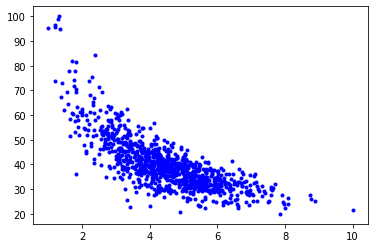

In [6]:
plt.plot(X,y,'b.')

In [7]:
#X = np.array(X).reshape(-1, 1)
#y = np.array(y).reshape(-1, 1)

###1 Train test split
Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


###2 Regresión Lineal
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [9]:
#lineal
from sklearn.linear_model import LinearRegression

X_RLS=X_train
y_RLS=y_train

modelo_RLS = LinearRegression(fit_intercept=True)
modelo_RLS.fit(X_RLS, y_RLS)

LinearRegression()

###Ecuación

In [10]:
modelo_RLS.coef_, modelo_RLS.intercept_

(array([-5.98882699]), 66.83650741226988)

The model estimates:

$\hat{y} = -5.99X + 66.83$

###Visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


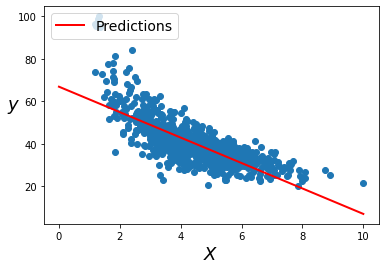

In [11]:
# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = modelo_RLS.predict(X_fit[:, np.newaxis])

plt.scatter(X_RLS, y_RLS)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

##Errores y R^2

In [12]:
#X = df[['Number of Units']]
#y = df['Manufacturing Cost']

params_RLS = pd.Series(modelo_RLS.coef_, index=X_RLS.columns)
params_RLS

Number of Units   -5.988827
dtype: float64

In [13]:
from sklearn.utils import resample
np.random.seed(1)
err_RLS = np.std([modelo_RLS.fit(*resample(X_RLS, y_RLS)).coef_
              for i in range(1000)], 0)

In [14]:
print(pd.DataFrame({'effect': params_RLS.round(2),
                    'error': err_RLS.round(2)}))

                 effect  error
Number of Units   -5.99   0.26


In [15]:
y_pred_RLS=modelo_RLS.predict(X_RLS)

In [16]:
print(modelo_RLS.score(X_RLS, y_RLS))
print(modelo_RLS.score(X_train, y_train))
print(modelo_RLS.score(X_test, y_test))

0.5726482801733355
0.5726482801733355
0.6140285030595094


In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_RLS, y_pred_RLS)))

Root Mean Squared Error: 6.86097321181948


##3 Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [18]:
X_RPS = X_train#df[['Number of Units']]
y_RPS = y_train#df['Manufacturing Cost']

### Visualización

Text(0, 0.5, '$y$')

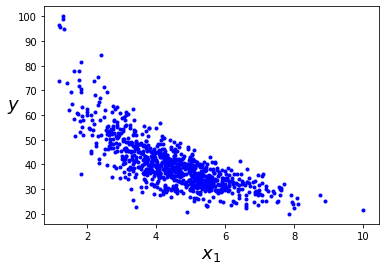

In [19]:
plt.plot(X_RPS, y_RPS, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.axis([-3, 3, 0, 10]);

In [20]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_RPS)
X_polyT = poly_features.fit_transform(X_test)

In [21]:
X_poly

array([[7.97424764e+00, 6.35886254e+01, 5.07071446e+02, 4.04351328e+03],
       [1.89573077e+00, 3.59379517e+00, 6.81286809e+00, 1.29153637e+01],
       [3.57650140e+00, 1.27913623e+01, 4.57483252e+01, 1.63618949e+02],
       ...,
       [3.94046305e+00, 1.55272490e+01, 6.11845511e+01, 2.41095463e+02],
       [4.52448429e+00, 2.04709581e+01, 9.26205283e+01, 4.19060126e+02],
       [5.86814353e+00, 3.44351085e+01, 2.02070159e+02, 1.18577670e+03]])

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_RPS)
lin_reg.intercept_.round(2), lin_reg.coef_.round(1)

(132.04, array([-54.8,  12.4,  -1.3,   0.1]))

### Ecuación

The model estimates:

$\hat{y} =  -54.8X +12.4X^2 -1.3X^3 +0.1X^4 + 132.04$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


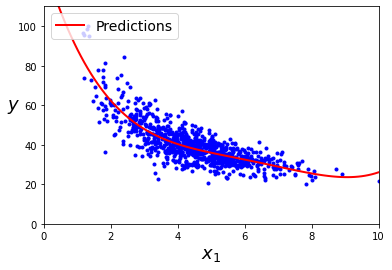

In [23]:
X_new=np.linspace(0,10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 110]);


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


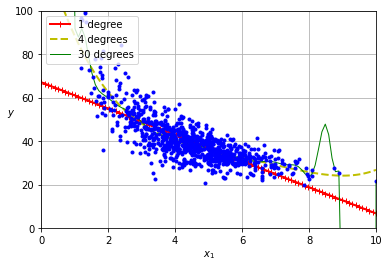

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("y--", 2, 4), ("g-", 1, 30)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg_graph = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X_RPS, y_RPS, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 10, 0, 100])
plt.grid()
plt.show()

###Errores

In [25]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_RPS)
lin_reg.intercept_.round(2), lin_reg.coef_.round(1)

params_LRP = pd.Series(lin_reg.coef_)
params_LRP

0   -54.836512
1    12.442255
2    -1.325527
3     0.052367
dtype: float64

In [26]:
np.random.seed(1)
err = np.std([lin_reg.fit(*resample(X_poly, y_train)).coef_
              for i in range(1000)], 0)

In [27]:
print(pd.DataFrame({'effect': params_LRP.round(2),
                    'error': err.round(2)}))

   effect  error
0  -54.84  11.97
1   12.44   3.86
2   -1.33   0.53
3    0.05   0.03


In [28]:
y_poly_pred=lin_reg.predict(X_poly)
y_poly_predT=lin_reg.predict(X_polyT)

In [29]:
print("R^2 ", lin_reg.score(X_poly, y_RPS))
print("R^2 ", lin_reg.score(X_polyT, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_RPS, y_poly_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_predT)))

R^2  0.680345105093638
R^2  0.7699758710037837
Root Mean Squared Error: 5.933810534150991
Root Mean Squared Error: 5.471008940397853


In [30]:
#X_poly = np.array(X_poly).reshape(-1, 1)

print('r2_score',r2_score(y_RPS, y_poly_pred))

r2_score 0.680345105093638


Text(3, 0.75, 'Maximum R^2 ')

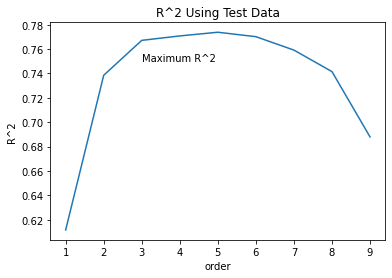

In [31]:
Rsqu_test = []

order = [1, 2, 3, 4,5,6,7,8,9]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train)
    
    x_test_pr = pr.fit_transform(X_test)    
    
    lin_reg.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lin_reg.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

#Ridge y Lasso

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [32]:
np.random.seed(42)

X_Ridge1 = X_train#df[['Number of Units']]
y_Ridge1 = y_train#df['Manufacturing Cost']

X_new = np.linspace(0, 10, 100).reshape(100, 1)

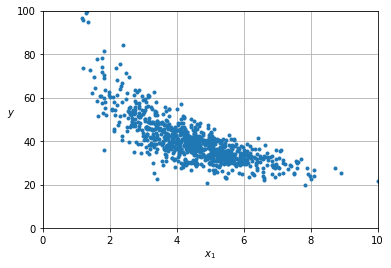

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(X_Ridge1, y_Ridge1, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 10, 0, 100])
plt.grid()
plt.show()

In [34]:
from sklearn.linear_model import Ridge

ridge1_reg = Ridge(alpha=0.1, solver="cholesky")
ridge1_reg.fit(X_Ridge1, y_Ridge1)
ridge1_reg.predict([[10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


array([6.95032101])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature 

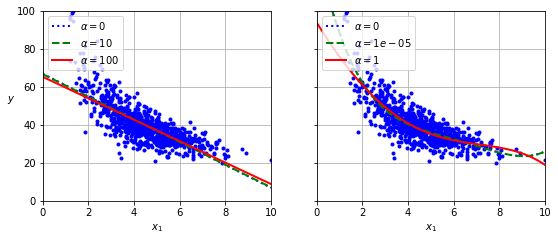

In [35]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X_Ridge1, y_Ridge1, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=4, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X_Ridge1, y_Ridge1)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 10, 0, 100])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import add_dummy_feature

X_b_Ridge1 = add_dummy_feature(X_Ridge1)
m_Ridge1 = len(X_b_Ridge1)

sgd_reg = SGDRegressor(penalty="l2", 
                       alpha=.01 / m_Ridge1, 
                       tol=None,
                       max_iter=1000, 
                       eta0=0.01, 
                       random_state=42)
sgd_reg.fit(X_Ridge1, y_Ridge1.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([57.82341809])

In [37]:
ridge1_reg_sag = Ridge(alpha=.01, 
                  solver="sag", 
                  random_state=42)
ridge1_reg_sag.fit(X_Ridge1, y_Ridge1)
ridge1_reg_sag.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


array([57.70861835])

In [38]:
ridge1_reg_sag.intercept_, ridge1_reg_sag.coef_  # extra code

(66.61889582081601, array([-5.94018498]))

$\hat{y} =  -5.94X + 66.62$

In [39]:
paramsRR1 = pd.Series(ridge1_reg_sag.coef_)
paramsRR1

from sklearn.utils import resample
np.random.seed(1)
errRR1 = np.std([ridge1_reg_sag.fit(*resample(X_Ridge1, y_Ridge1)).coef_
              for i in range(1000)], 0)

print(pd.DataFrame({'effect': paramsRR1.round(2),
                    'error': errRR1.round(2)}))

   effect  error
0   -5.94   0.27


In [40]:
y_predRidge1=ridge1_reg_sag.predict(X_Ridge1)

In [41]:
print("Train", ridge1_reg_sag.score(X_Ridge1,y_Ridge1))
print("Test", ridge1_reg_sag.score(X_test,y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Ridge1, y_predRidge1)))

Train 0.5727424539888931
Test 0.6140117952812545
Root Mean Squared Error: 6.860217207343902


In [42]:
from sklearn.linear_model import Lasso
X_lasso=X_train
y_lasso=y_train

lasso_reg1 = Lasso(alpha=0.1)
lasso_reg1.fit(X_lasso, y_lasso)
lasso_reg1.predict([[10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


array([7.26136685])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

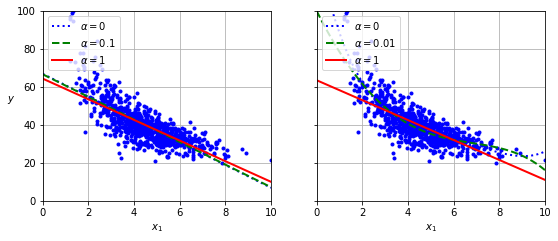

In [43]:
# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [44]:
lasso_reg1.intercept_, lasso_reg1.coef_

(66.58301628789998, array([-5.93216494]))

$\hat{y} =  -5.93X + 66.58$

In [45]:
params_Lasso1 = pd.Series(lasso_reg1.coef_)
params_Lasso1

from sklearn.utils import resample
np.random.seed(1)
err_Lasso1 = np.std([lasso_reg1.fit(*resample(X_lasso, y_lasso)).coef_
              for i in range(1000)], 0)

print(pd.DataFrame({'effect': params_Lasso1.round(2),
                    'error': err_Lasso1.round(2)}))

   effect  error
0   -5.93   0.26


In [46]:
y_pred_Lasso1=lasso_reg1.predict(X_lasso)
y_pred_Lasso1T=lasso_reg1.predict(X_test)

In [47]:
print(lasso_reg1.score(X_lasso,y_lasso))
print(lasso_reg1.score(X_test,y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_lasso, y_pred_Lasso1)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lasso1T)))

0.567390335360457
0.5979062391101215
Root Mean Squared Error: 6.90305135582461
Root Mean Squared Error: 7.233431852217553


###Gráficas

Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

In [48]:
from sklearn.metrics import mean_absolute_error

print("Regresión simple lineal")
print('mae', mean_absolute_error(y_train, y_pred_RLS).round(2),'%')
print('r2_score',r2_score(y_train, y_pred_RLS).round(2))
print('*'*30)
print("Regresión polinomial")
print('mae', mean_absolute_error(y_train, y_poly_pred).round(2),'%')
print('r2_score',r2_score(y_train, y_poly_pred).round(2))
print('*'*30)
print("Regresión ridge")
print('mae', mean_absolute_error(y_train, y_predRidge1).round(2),'%')
print('r2_score',r2_score(y_train, y_predRidge1).round(2))
print('*'*30)
print("Regresión lasso")
print('mae', mean_absolute_error(y_train, y_pred_Lasso1).round(2),'%')
print('r2_score',r2_score(y_train, y_pred_Lasso1).round(2))

Regresión simple lineal
mae 4.96 %
r2_score 0.57
******************************
Regresión polinomial
mae 4.48 %
r2_score 0.68
******************************
Regresión ridge
mae 4.96 %
r2_score 0.57
******************************
Regresión lasso
mae 4.85 %
r2_score 0.57


In [49]:

y = pd.Series(y)
y_pred_RLS = modelo_RLS.predict(X)
y_pred_RLS = pd.Series(y_pred_RLS)
frame = { 'y': y, 'y_pred_RLS': y_pred_RLS }
df1 = pd.DataFrame(frame)

y_train = pd.Series(y_train)
y_pred_poly = pd.Series(y_poly_pred)
frame = { 'y': y_train, 'y_pred_poly': y_poly_pred }
df2 = pd.DataFrame(frame)

y = pd.Series(y)
y_pred_Ridge = ridge1_reg_sag.predict(X)
y_pred_Ridge = pd.Series(y_predRidge1)
frame = { 'y': y_train, 'y_pred_Ridge': y_predRidge1 }
df3 = pd.DataFrame(frame)

y = pd.Series(y)
y_pred_Lasso1 = lasso_reg1.predict(X)
y_pred_Lasso1 = pd.Series(y_pred_Lasso1)
frame = { 'y':y_train, 'y_pred_Lasso1': y_pred_Lasso1 }
df4 = pd.DataFrame(frame)

In [50]:
df1['MAE']=abs(df1['y']-df1['y_pred_RLS']).round(2)

df2['MAE']=abs(df2['y']-df2['y_pred_poly']).round(2)

df3['MAE']=abs(df3['y']-df3['y_pred_Ridge']).round(2)

df4['MAE']=abs(df4['y']-df4['y_pred_Lasso1']).round(2)

AxesSubplot(0.125,0.125;0.775x0.755)


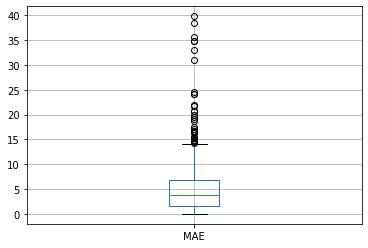

In [51]:
print(df1.boxplot(column=['MAE']))

AxesSubplot(0.125,0.125;0.775x0.755)


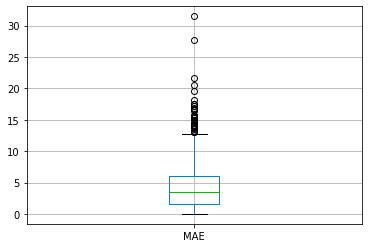

In [52]:
print(df2.boxplot(column=['MAE']))

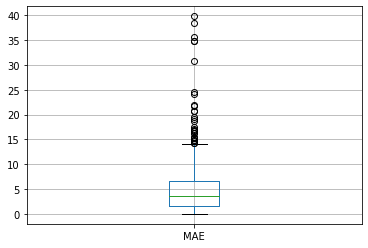

In [53]:
df3.boxplot(column=['MAE'])


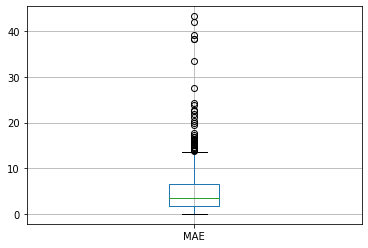

In [54]:
df4.boxplot(column=['MAE'])

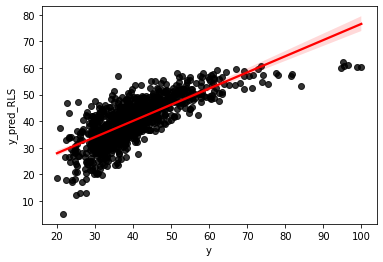

In [55]:
sns.regplot(x='y', y='y_pred_RLS', data=df1,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

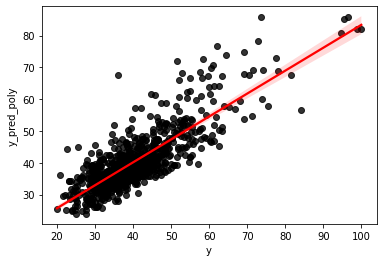

In [56]:
sns.regplot(x='y', y='y_pred_poly', data=df2,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

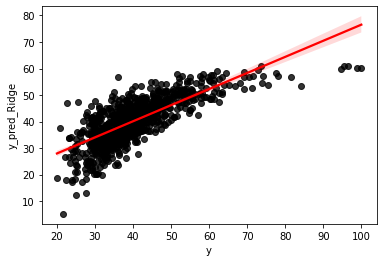

In [57]:
sns.regplot(x='y', y='y_pred_Ridge', data=df3,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

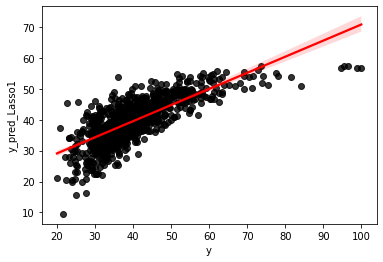

In [58]:
sns.regplot(x='y', y='y_pred_Lasso1', data=df4,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

##Conclusión Ejercicio 1
Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

El método que más conviene es el polinomial, ya que tiene un menor porcentaje de mae y una R2 de casi .7. El entrenamiento se realizó con el 90% de los datos. Considero que sí es bueno, ya que el R2 no está debajo del .5, por lo que si hay una correlación entre los resultados obtenidos y los originales, es posible que haya algo de ruido en los datos y que eso aporte a que no se tenga una correlación más alta; no obstante, pienso que es probable que con algún otro modelo se pueda obtener un mejor resultado. 

#Ejercicio 2. Regresión múltiple.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [60]:
casas= pd.read_csv('/content/sample_data/california_housing_train.csv')
casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [61]:
casas.shape

(17000, 9)

##Train Test Split
Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [62]:
features = casas[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]
X = features
y = casas['median_house_value']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 17000
**************************************************
Numero total de registros en el training set: 15300
Tamaño de X_train: (15300, 8)
**************************************************
Mumero total de registros en el test dataset: 1700
Tamaño del X_test: (1700, 8)


##Regresión Múltiple Lineal
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [64]:
model_ML = LinearRegression(fit_intercept=False)
model_ML.fit(X_train, y_train)
casas['predicted'] = model_ML.predict(X)

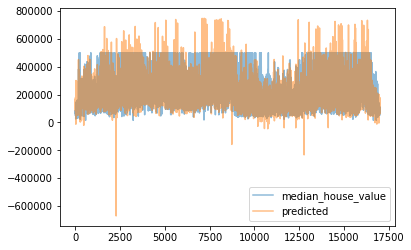

In [65]:
casas[['median_house_value', 'predicted']].plot(alpha=0.5);

In [66]:
model_ML.intercept_, model_ML.coef_.round(3)

(0.0, array([-2.260755e+03, -8.491373e+03,  1.741654e+03, -1.577100e+01,
         7.869200e+01, -4.001600e+01,  1.362390e+02,  4.578490e+04]))

The model estimates:

$\hat{y} = -2260.75X -8491.37X^2 +1741.65X^3 -15.77X^4 +78.69X^5 -40.02X^6 +136.24X^7 +45784.90X^8 + 0$

In [67]:
params = pd.Series(model_ML.coef_, index=X.columns)
params

longitude             -2260.755247
latitude              -8491.372527
housing_median_age     1741.654495
total_rooms             -15.771132
total_bedrooms           78.692337
population              -40.015696
households              136.238976
median_income         45784.899564
dtype: float64

In [68]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model_ML.fit(*resample(X_train, y_train)).coef_
              for i in range(1000)], 0)

In [69]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                     effect  error
longitude           -2261.0  172.0
latitude            -8491.0  479.0
housing_median_age   1742.0   64.0
total_rooms           -16.0    2.0
total_bedrooms         79.0   12.0
population            -40.0    6.0
households            136.0   19.0
median_income       45785.0  686.0


In [70]:
y_pred=model_ML.predict(X_train)
y_predT=model_ML.predict(X_test)

In [71]:
print(model_ML.score(X_train, y_train).round(6))
print(model_ML.score(X_test, y_test).round(6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predT)))

0.582488
0.583685
Root Mean Squared Error: 74707.71586678336
Root Mean Squared Error: 76886.37353679343


##Regresión Múltiple Polinomial.
Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [72]:
from sklearn.preprocessing import PolynomialFeatures

poly_featuresMLP = PolynomialFeatures(degree=2, include_bias=False)
XMLP_poly = poly_featuresMLP.fit_transform(X_train)
XTMLP_poly = poly_featuresMLP.fit_transform(X_test)

In [73]:
modelo_MLP = LinearRegression()
modelo_MLP.fit(XMLP_poly, y_train)
modelo_MLP.intercept_, modelo_MLP.coef_

(17485808.859496318,
 array([ 5.37769094e+05,  8.61429006e+05, -7.91059828e+04,  9.28067469e+02,
        -4.11041693e+03,  5.61098887e+02, -2.25563073e+03, -9.52453016e+05,
         3.77645104e+03,  1.07500413e+04, -9.71366372e+02,  1.23950328e+01,
        -6.10431878e+01,  6.54496897e+00, -2.05456449e+01, -1.23460624e+04,
         6.24326438e+03, -1.06002536e+03,  1.37827675e+01, -7.73928308e+01,
         7.26999284e+00, -1.30455027e+01, -1.29795025e+04,  1.70316905e+01,
        -5.87012693e-02,  1.13635849e+00, -2.02880171e+00,  5.81530188e+00,
         5.86922319e+01, -2.40984333e-03,  4.11133897e-02, -3.16632556e-03,
        -2.04216085e-03,  1.04396582e+01, -1.96312118e-01,  6.40698656e-03,
         1.03014233e-01, -5.33520079e+01,  6.33863005e-04,  9.71992935e-03,
        -1.19018810e+01, -4.30961472e-02,  3.76644360e+01, -2.60996162e+03]))

The model estimates:

$\hat{y} = 537769.09X + 861429X^2 -79105.98X^3 + 928.07X^4
 -4110.42X^5 + 561.10X^6 -2255.63X^7 -952453.02X^8 + 3776.45X^9 + 10750.04X^10 -971.37X^11 + 12.39X^12 -61.04X^13 + 6.54X^14 -20.54X^15 -12346.06X^16 + 6243.26X^17 -1060.03X^18 + 13.78X^19 -77.39X^20 + 7.3X^21 -13.04X^22 -12979.50X^23 + 17.03X^24 -.05X^25 +  1.14X^26 -2.03X^27 +  5.82X^28 + 58.7X^29 -.002X^30 + .04X^31 -.003X^32 -.002X^33 + 10.44X^34 -.19X^35 + .006X^36 + .103X^37 -53.35X^38 + .0006X^39 +.009X^40 -11.90X^41 -.04X^42 + 37.66X^43 -2609.96X^44 + 17485808.86$


In [74]:
XMLP_poly=pd.DataFrame(XMLP_poly)
params = pd.Series(modelo_MLP.coef_, index=XMLP_poly.columns)
params

0     537769.093584
1     861429.005605
2     -79105.982804
3        928.067469
4      -4110.416926
5        561.098887
6      -2255.630734
7    -952453.015908
8       3776.451038
9      10750.041322
10      -971.366372
11        12.395033
12       -61.043188
13         6.544969
14       -20.545645
15    -12346.062353
16      6243.264385
17     -1060.025358
18        13.782767
19       -77.392831
20         7.269993
21       -13.045503
22    -12979.502474
23        17.031691
24        -0.058701
25         1.136358
26        -2.028802
27         5.815302
28        58.692232
29        -0.002410
30         0.041113
31        -0.003166
32        -0.002042
33        10.439658
34        -0.196312
35         0.006407
36         0.103014
37       -53.352008
38         0.000634
39         0.009720
40       -11.901881
41        -0.043096
42        37.664436
43     -2609.961618
dtype: float64

In [75]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([modelo_MLP.fit(*resample(XMLP_poly, y_train)).coef_
              for i in range(1000)], 0)

In [76]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

      effect     error
0   537769.0  127574.0
1   861429.0  114324.0
2   -79106.0    6631.0
3      928.0     205.0
4    -4110.0    1369.0
5      561.0     359.0
6    -2256.0    1632.0
7  -952453.0   74170.0
8     3776.0     730.0
9    10750.0    1340.0
10    -971.0      77.0
11      12.0       2.0
12     -61.0      15.0
13       7.0       4.0
14     -21.0      18.0
15  -12346.0     883.0
16    6243.0     648.0
17   -1060.0      73.0
18      14.0       2.0
19     -77.0      14.0
20       7.0       4.0
21     -13.0      15.0
22  -12980.0     915.0
23      17.0       4.0
24      -0.0       0.0
25       1.0       1.0
26      -2.0       0.0
27       6.0       1.0
28      59.0      41.0
29      -0.0       0.0
30       0.0       0.0
31      -0.0       0.0
32      -0.0       0.0
33      10.0       1.0
34      -0.0       0.0
35       0.0       0.0
36       0.0       0.0
37     -53.0      13.0
38       0.0       0.0
39       0.0       0.0
40     -12.0       2.0
41      -0.0       0.0
42      38.

In [77]:
print("Train R2", modelo_MLP.score(XMLP_poly,y_train))
XTMLP_poly = poly_featuresMLP.fit_transform(X_test)
print("Test R2",modelo_MLP.score(XTMLP_poly,y_test))

y_pred_MLS=modelo_MLP.predict(XMLP_poly)
y_pred_MLST=modelo_MLP.predict(XTMLP_poly)

print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_MLS)))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_MLST)))

Train R2 0.7071461743940768
Test R2 0.6788973480687411
Train Root Mean Squared Error: 62568.625257615044
Test Root Mean Squared Error: 67524.33499845177


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)
Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Agrega las conclusiones

In [78]:
np.random.seed(42)

X_Ridge2 = X_train#df[['Number of Units']]
y_Ridge2 = y_train#df['Manufacturing Cost']

X_new2 = np.linspace(0, 10, 100).reshape(100, 1)
#print(X_Ridge2.columns)

In [79]:
pr=PolynomialFeatures(degree=4)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)

In [80]:
RigeModel=Ridge(alpha=1)

In [81]:
RigeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10901e-38): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1)

In [82]:
yhatR = RigeModel.predict(x_test_pr)

In [83]:
print('predicted:', yhatR[0:4])
print('test set :', y_test[0:4].values)

predicted: [269597.35025051 225673.1048331  145205.08668281 108829.73286243]
test set : [240200. 272400. 142200.  96900.]


In [84]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 1/1000 [00:01<26:42,  1.60s/it, Test Score=-1.64, Train Score=0.41]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35794e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
  0%|          | 2/1000 [00:01<13:23,  1.24it/s, Test Score=0.555, Train Score=0.783]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.64632e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
  0%|          | 3/1000 [00:02<09:00,  1.85it/s, Test Score=0.561, Train Score=0.783]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.99432e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
  0%|          | 4/1000 [00:02<06:56,  2.39it/s, Test Score=0.567, Trai

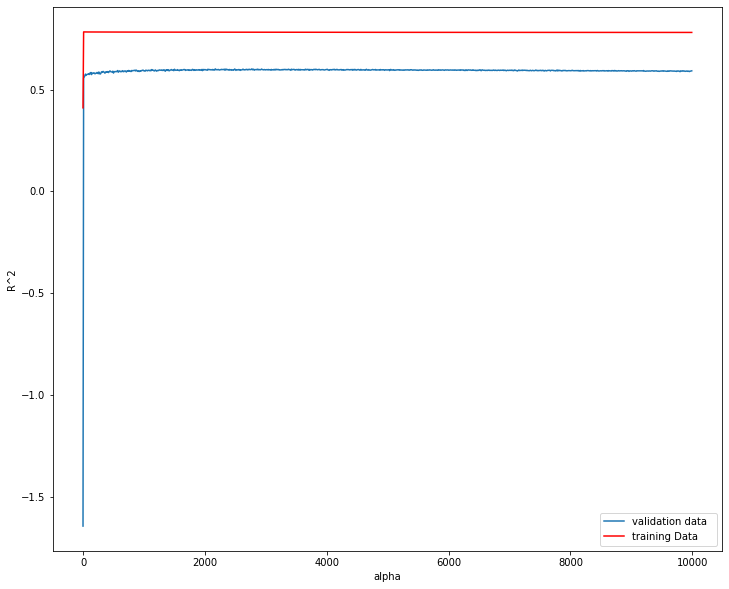

In [85]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [86]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35794e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.5553548075111567

In [159]:
print(RigeModel.intercept_,'+',RigeModel.coef_)

-7923813.188716805 + [ 0.00000000e+00  9.74045444e+01  5.36795670e+02  1.31019803e+02
  7.89139985e+03  1.84429563e+03  3.64186075e+03  1.01679014e+03
 -2.28709193e+02 -7.71455524e+03 -1.89673110e+04 -7.21530378e+03
 -1.44714583e+03 -3.55998585e+03  9.37564659e+03  1.41375486e+04
  8.57659897e+03  1.01389990e+04  8.96472904e+03 -3.29514807e+03
  5.42504925e+03  3.18794906e+04  1.49193762e+04 -1.99502076e+03
  1.29878732e+04 -1.22874187e+03 -6.58180416e+03  1.76019410e+03
  9.87638083e+03 -1.56018741e+03  1.99655343e+01 -2.43675641e+02
  1.07126900e+01  2.38763367e+01 -7.13636152e+03  8.80311463e+02
  5.78856401e+02 -2.89879192e+03 -1.12262759e+04 -1.53273192e+01
 -6.07831303e+02  9.44357365e+03  2.78295420e+03 -6.15449680e+03
 -4.64023382e+02 -5.27573879e+02 -3.00969452e+03 -3.59286511e+01
 -2.01559255e+01 -4.50038062e+02  2.01460316e+02  5.80148194e+02
  2.67884377e+03 -4.98386939e+03  6.59840111e+02 -6.75566468e+00
 -2.32595833e+03  8.03728840e+02  2.36139018e+03  1.45286014e+04
  3.

In [146]:
r = pd.DataFrame(RigeModel.coef_)
r.describe()

,0
count,495.000000
mean,239.097388
std,2790.450041
min,-18967.310958
25%,-0.051506
50%,0.000002
75%,0.475723
max,31879.490564


###Ecuación

In [175]:
print(RigeModel.intercept_)
n = range(0,495)
for num in n:
  #print(num)
  print('+',r.iloc[num,0].round(2),"X^",num+1)

-7923813.188716805
+ 0.0 X^ 1
+ 97.4 X^ 2
+ 536.8 X^ 3
+ 131.02 X^ 4
+ 7891.4 X^ 5
+ 1844.3 X^ 6
+ 3641.86 X^ 7
+ 1016.79 X^ 8
+ -228.71 X^ 9
+ -7714.56 X^ 10
+ -18967.31 X^ 11
+ -7215.3 X^ 12
+ -1447.15 X^ 13
+ -3559.99 X^ 14
+ 9375.65 X^ 15
+ 14137.55 X^ 16
+ 8576.6 X^ 17
+ 10139.0 X^ 18
+ 8964.73 X^ 19
+ -3295.15 X^ 20
+ 5425.05 X^ 21
+ 31879.49 X^ 22
+ 14919.38 X^ 23
+ -1995.02 X^ 24
+ 12987.87 X^ 25
+ -1228.74 X^ 26
+ -6581.8 X^ 27
+ 1760.19 X^ 28
+ 9876.38 X^ 29
+ -1560.19 X^ 30
+ 19.97 X^ 31
+ -243.68 X^ 32
+ 10.71 X^ 33
+ 23.88 X^ 34
+ -7136.36 X^ 35
+ 880.31 X^ 36
+ 578.86 X^ 37
+ -2898.79 X^ 38
+ -11226.28 X^ 39
+ -15.33 X^ 40
+ -607.83 X^ 41
+ 9443.57 X^ 42
+ 2782.95 X^ 43
+ -6154.5 X^ 44
+ -464.02 X^ 45
+ -527.57 X^ 46
+ -3009.69 X^ 47
+ -35.93 X^ 48
+ -20.16 X^ 49
+ -450.04 X^ 50
+ 201.46 X^ 51
+ 580.15 X^ 52
+ 2678.84 X^ 53
+ -4983.87 X^ 54
+ 659.84 X^ 55
+ -6.76 X^ 56
+ -2325.96 X^ 57
+ 803.73 X^ 58
+ 2361.39 X^ 59
+ 14528.6 X^ 60
+ 351.07 X^ 61
+ -19.95 X^ 62
+ -183.48 

$\hat{y} = -7923813.188716805
+ 0.0 X + 97.4 X^ 2
+ 536.8 X^ 3
+ 131.02 X^ 4
+ 7891.4 X^ 5
+ 1844.3 X^ 6
+ 3641.86 X^ 7
+ 1016.79 X^ 8
+ -228.71 X^ 9
+ -7714.56 X^ 10
+ -18967.31 X^ 11
+ -7215.3 X^ 12
+ -1447.15 X^ 13
+ -3559.99 X^ 14
+ 9375.65 X^ 15
+ 14137.55 X^ 16
+ 8576.6 X^ 17
+ 10139.0 X^ 18
+ 8964.73 X^ 19
+ -3295.15 X^ 20
+ 5425.05 X^ 21
+ 31879.49 X^ 22
+ 14919.38 X^ 23
+ -1995.02 X^ 24
+ 12987.87 X^ 25
+ -1228.74 X^ 26
+ -6581.8 X^ 27
+ 1760.19 X^ 28
+ 9876.38 X^ 29
+ -1560.19 X^ 30
+ 19.97 X^ 31
+ -243.68 X^ 32
+ 10.71 X^ 33
+ 23.88 X^ 34
+ -7136.36 X^ 35
+ 880.31 X^ 36
+ 578.86 X^ 37
+ -2898.79 X^ 38
+ -11226.28 X^ 39
+ -15.33 X^ 40
+ -607.83 X^ 41
+ 9443.57 X^ 42
+ 2782.95 X^ 43
+ -6154.5 X^ 44
+ -464.02 X^ 45
+ -527.57 X^ 46
+ -3009.69 X^ 47
+ -35.93 X^ 48
+ -20.16 X^ 49
+ -450.04 X^ 50
+ 201.46 X^ 51
+ 580.15 X^ 52
+ 2678.84 X^ 53
+ -4983.87 X^ 54
+ 659.84 X^ 55
+ -6.76 X^ 56
+ -2325.96 X^ 57
+ 803.73 X^ 58
+ 2361.39 X^ 59
+ 14528.6 X^ 60
+ 351.07 X^ 61
+ -19.95 X^ 62
+ -183.48 X^ 63
+ 51.11 X^ 64
+ 191.25 X^ 65
+ 448.14 X^ 66
+ 0.55 X^ 67
+ -6.17 X^ 68
+ -0.0 X^ 69
+ 1.01 X^ 70
+ -199.08 X^ 71
+ 24.95 X^ 72
+ 15.08 X^ 73
+ -78.88 X^ 74
+ -642.67 X^ 75
+ -0.05 X^ 76
+ -15.73 X^ 77
+ 324.56 X^ 78
+ 70.93 X^ 79
+ 290.66 X^ 80
+ 1535.02 X^ 81
+ -1395.46 X^ 82
+ 534.08 X^ 83
+ 100.96 X^ 84
+ -3737.51 X^ 85
+ 405.46 X^ 86
+ 3209.14 X^ 87
+ 20699.21 X^ 88
+ 759.3 X^ 89
+ -2.73 X^ 90
+ -212.13 X^ 91
+ 65.8 X^ 92
+ 91.75 X^ 93
+ 2141.01 X^ 94
+ 0.67 X^ 95
+ -7.16 X^ 96
+ -0.6 X^ 97
+ 2.64 X^ 98
+ -277.52 X^ 99
+ 34.35 X^ 100
+ 18.36 X^ 101
+ -102.25 X^ 102
+ -1375.11 X^ 103
+ 0.63 X^ 104
+ -19.19 X^ 105
+ 543.08 X^ 106
+ 81.62 X^ 107
+ 1182.14 X^ 108
+ -512.34 X^ 109
+ -107.47 X^ 110
+ 1.9 X^ 111
+ -17.69 X^ 112
+ -0.47 X^ 113
+ 9.15 X^ 114
+ -842.06 X^ 115
+ 0.01 X^ 116
+ -0.19 X^ 117
+ -0.05 X^ 118
+ 0.22 X^ 119
+ 31.11 X^ 120
+ 0.36 X^ 121
+ -0.3 X^ 122
+ 0.78 X^ 123
+ 6.58 X^ 124
+ 0.01 X^ 125
+ 0.56 X^ 126
+ 88.03 X^ 127
+ -1.51 X^ 128
+ -401.47 X^ 129
+ -30.98 X^ 130
+ -0.0 X^ 131
+ -0.0 X^ 132
+ 0.0 X^ 133
+ 0.0 X^ 134
+ 0.16 X^ 135
+ 0.02 X^ 136
+ 0.0 X^ 137
+ -0.03 X^ 138
+ 2.84 X^ 139
+ -0.0 X^ 140
+ 0.0 X^ 141
+ 0.62 X^ 142
+ 0.01 X^ 143
+ -6.71 X^ 144
+ 53.76 X^ 145
+ -0.05 X^ 146
+ -0.0 X^ 147
+ 0.14 X^ 148
+ -6.81 X^ 149
+ 0.0 X^ 150
+ 0.03 X^ 151
+ -10.63 X^ 152
+ -0.2 X^ 153
+ 32.92 X^ 154
+ -1256.44 X^ 155
+ 0.0 X^ 156
+ 0.0 X^ 157
+ -0.44 X^ 158
+ -0.04 X^ 159
+ 12.45 X^ 160
+ -278.99 X^ 161
+ 0.12 X^ 162
+ -19.63 X^ 163
+ 1726.51 X^ 164
+ 9925.7 X^ 165
+ -13.52 X^ 166
+ -150.21 X^ 167
+ 1.08 X^ 168
+ -0.1 X^ 169
+ -4.11 X^ 170
+ 1.07 X^ 171
+ 4.63 X^ 172
+ 47.41 X^ 173
+ -658.69 X^ 174
+ 13.31 X^ 175
+ -0.18 X^ 176
+ -25.49 X^ 177
+ 4.8 X^ 178
+ 25.93 X^ 179
+ 364.58 X^ 180
+ 2.35 X^ 181
+ -0.08 X^ 182
+ -1.17 X^ 183
+ 0.34 X^ 184
+ 0.94 X^ 185
+ 3.91 X^ 186
+ 0.0 X^ 187
+ -0.04 X^ 188
+ -0.0 X^ 189
+ 0.01 X^ 190
+ -1.37 X^ 191
+ 0.17 X^ 192
+ 0.1 X^ 193
+ -0.52 X^ 194
+ -5.31 X^ 195
+ 0.0 X^ 196
+ -0.1 X^ 197
+ 2.06 X^ 198
+ 0.44 X^ 199
+ 4.48 X^ 200
+ 61.88 X^ 201
+ -1343.96 X^ 202
+ 31.39 X^ 203
+ -0.21 X^ 204
+ -49.11 X^ 205
+ 4.3 X^ 206
+ 49.55 X^ 207
+ 943.49 X^ 208
+ 8.8 X^ 209
+ -0.05 X^ 210
+ -2.31 X^ 211
+ 0.73 X^ 212
+ 0.95 X^ 213
+ 19.35 X^ 214
+ 0.01 X^ 215
+ -0.09 X^ 216
+ -0.01 X^ 217
+ 0.04 X^ 218
+ -3.76 X^ 219
+ 0.45 X^ 220
+ 0.23 X^ 221
+ -1.29 X^ 222
+ -16.22 X^ 223
+ 0.01 X^ 224
+ -0.23 X^ 225
+ 4.48 X^ 226
+ 0.98 X^ 227
+ 20.71 X^ 228
+ 282.89 X^ 229
+ -0.92 X^ 230
+ 0.02 X^ 231
+ -0.21 X^ 232
+ 0.0 X^ 233
+ 0.1 X^ 234
+ -11.23 X^ 235
+ 0.0 X^ 236
+ -0.0 X^ 237
+ -0.0 X^ 238
+ 0.0 X^ 239
+ 0.35 X^ 240
+ 0.01 X^ 241
+ -0.0 X^ 242
+ 0.01 X^ 243
+ -0.29 X^ 244
+ 0.0 X^ 245
+ 0.01 X^ 246
+ 1.14 X^ 247
+ -0.02 X^ 248
+ -4.64 X^ 249
+ 4.77 X^ 250
+ -0.0 X^ 251
+ -0.0 X^ 252
+ 0.0 X^ 253
+ 0.0 X^ 254
+ 0.0 X^ 255
+ 0.0 X^ 256
+ 0.0 X^ 257
+ -0.0 X^ 258
+ 0.02 X^ 259
+ -0.0 X^ 260
+ 0.0 X^ 261
+ 0.01 X^ 262
+ 0.0 X^ 263
+ -0.07 X^ 264
+ 0.63 X^ 265
+ -0.0 X^ 266
+ -0.0 X^ 267
+ 0.0 X^ 268
+ 0.0 X^ 269
+ -0.0 X^ 270
+ 0.0 X^ 271
+ -0.11 X^ 272
+ -0.0 X^ 273
+ 0.22 X^ 274
+ -11.61 X^ 275
+ 0.0 X^ 276
+ 0.0 X^ 277
+ -0.01 X^ 278
+ -0.0 X^ 279
+ 0.14 X^ 280
+ -3.28 X^ 281
+ 0.0 X^ 282
+ -0.17 X^ 283
+ 17.41 X^ 284
+ 145.56 X^ 285
+ -1077.39 X^ 286
+ 28.35 X^ 287
+ -1.02 X^ 288
+ -18.8 X^ 289
+ 0.9 X^ 290
+ 23.69 X^ 291
+ 815.33 X^ 292
+ 4.94 X^ 293
+ -0.06 X^ 294
+ -0.76 X^ 295
+ 0.25 X^ 296
+ 0.32 X^ 297
+ 4.46 X^ 298
+ 0.0 X^ 299
+ -0.05 X^ 300
+ -0.01 X^ 301
+ 0.03 X^ 302
+ -2.51 X^ 303
+ 0.27 X^ 304
+ 0.13 X^ 305
+ -0.72 X^ 306
+ -7.45 X^ 307
+ 0.01 X^ 308
+ -0.12 X^ 309
+ -0.16 X^ 310
+ 0.5 X^ 311
+ 17.93 X^ 312
+ 429.81 X^ 313
+ -0.43 X^ 314
+ 0.02 X^ 315
+ -0.17 X^ 316
+ 0.01 X^ 317
+ 0.09 X^ 318
+ -12.61 X^ 319
+ 0.0 X^ 320
+ -0.0 X^ 321
+ -0.0 X^ 322
+ 0.0 X^ 323
+ 0.33 X^ 324
+ 0.01 X^ 325
+ -0.0 X^ 326
+ 0.0 X^ 327
+ -0.81 X^ 328
+ 0.0 X^ 329
+ 0.0 X^ 330
+ 1.16 X^ 331
+ -0.01 X^ 332
+ -4.23 X^ 333
+ 14.39 X^ 334
+ 0.0 X^ 335
+ -0.0 X^ 336
+ 0.0 X^ 337
+ -0.0 X^ 338
+ 0.0 X^ 339
+ 0.0 X^ 340
+ 0.0 X^ 341
+ -0.0 X^ 342
+ 0.01 X^ 343
+ -0.0 X^ 344
+ -0.0 X^ 345
+ 0.01 X^ 346
+ 0.0 X^ 347
+ -0.03 X^ 348
+ 0.85 X^ 349
+ -0.0 X^ 350
+ -0.0 X^ 351
+ 0.0 X^ 352
+ 0.16 X^ 353
+ -0.0 X^ 354
+ 0.0 X^ 355
+ -0.09 X^ 356
+ -0.0 X^ 357
+ -0.1 X^ 358
+ -5.87 X^ 359
+ 0.0 X^ 360
+ 0.0 X^ 361
+ -0.01 X^ 362
+ -0.0 X^ 363
+ 0.13 X^ 364
+ -3.29 X^ 365
+ 0.0 X^ 366
+ -0.06 X^ 367
+ 10.34 X^ 368
+ 155.09 X^ 369
+ 0.13 X^ 370
+ 0.0 X^ 371
+ -0.01 X^ 372
+ 0.0 X^ 373
+ -0.01 X^ 374
+ -0.63 X^ 375
+ -0.0 X^ 376
+ -0.0 X^ 377
+ -0.0 X^ 378
+ 0.0 X^ 379
+ 0.0 X^ 380
+ 0.0 X^ 381
+ 0.0 X^ 382
+ -0.0 X^ 383
+ -0.06 X^ 384
+ -0.0 X^ 385
+ -0.0 X^ 386
+ 0.05 X^ 387
+ 0.0 X^ 388
+ -0.1 X^ 389
+ -1.11 X^ 390
+ -0.0 X^ 391
+ -0.0 X^ 392
+ -0.0 X^ 393
+ 0.0 X^ 394
+ 0.0 X^ 395
+ 0.0 X^ 396
+ 0.0 X^ 397
+ -0.0 X^ 398
+ 0.0 X^ 399
+ 0.0 X^ 400
+ -0.0 X^ 401
+ -0.0 X^ 402
+ 0.0 X^ 403
+ -0.0 X^ 404
+ -0.0 X^ 405
+ -0.0 X^ 406
+ 0.0 X^ 407
+ -0.0 X^ 408
+ -0.01 X^ 409
+ 0.0 X^ 410
+ -0.0 X^ 411
+ -0.0 X^ 412
+ 0.0 X^ 413
+ 0.03 X^ 414
+ -1.32 X^ 415
+ -0.0 X^ 416
+ -0.0 X^ 417
+ 0.0 X^ 418
+ 0.0 X^ 419
+ 0.0 X^ 420
+ 0.26 X^ 421
+ -0.0 X^ 422
+ -0.01 X^ 423
+ 0.57 X^ 424
+ 3.99 X^ 425
+ -0.0 X^ 426
+ 0.0 X^ 427
+ -0.0 X^ 428
+ 0.0 X^ 429
+ 0.0 X^ 430
+ -0.0 X^ 431
+ 0.0 X^ 432
+ -0.0 X^ 433
+ 0.0 X^ 434
+ 0.0 X^ 435
+ -0.0 X^ 436
+ 0.0 X^ 437
+ 0.0 X^ 438
+ -0.0 X^ 439
+ 0.0 X^ 440
+ -0.0 X^ 441
+ -0.0 X^ 442
+ 0.0 X^ 443
+ -0.0 X^ 444
+ 0.0 X^ 445
+ 0.0 X^ 446
+ -0.0 X^ 447
+ -0.0 X^ 448
+ 0.0 X^ 449
+ -0.02 X^ 450
+ -0.0 X^ 451
+ -0.0 X^ 452
+ -0.0 X^ 453
+ -0.0 X^ 454
+ 0.0 X^ 455
+ 0.0 X^ 456
+ 0.0 X^ 457
+ -0.0 X^ 458
+ 0.01 X^ 459
+ -0.49 X^ 460
+ 0.0 X^ 461
+ 0.0 X^ 462
+ -0.0 X^ 463
+ 0.0 X^ 464
+ -0.0 X^ 465
+ -0.0 X^ 466
+ 0.0 X^ 467
+ 0.0 X^ 468
+ -0.0 X^ 469
+ 0.17 X^ 470
+ -0.0 X^ 471
+ 0.0 X^ 472
+ 0.0 X^ 473
+ 0.0 X^ 474
+ -0.0 X^ 475
+ 0.02 X^ 476
+ -0.0 X^ 477
+ 0.01 X^ 478
+ -0.26 X^ 479
+ 5.61 X^ 480
+ -0.0 X^ 481
+ 0.0 X^ 482
+ -0.0 X^ 483
+ -0.0 X^ 484
+ -0.0 X^ 485
+ -0.0 X^ 486
+ -0.0 X^ 487
+ 0.0 X^ 488
+ -0.01 X^ 489
+ 0.1 X^ 490
+ 0.0 X^ 491
+ -0.0 X^ 492
+ 0.1 X^ 493
+ -1.97 X^ 494
+ 54.51 X^ 495$

In [88]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
print("Train",RigeModel.score(x_train_pr, y_train))
print("Test", RigeModel.score(x_test_pr, y_test))

Train 0.782777793391521
Test 0.5553548075111567


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35794e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [89]:
y_pred_ridge2=RigeModel.predict(x_train_pr)
yT_pred_ridge2=RigeModel.predict(x_test_pr)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_ridge2)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yT_pred_ridge2)))

Root Mean Squared Error: 53886.90897163569
Root Mean Squared Error: 79459.37965676631


In [90]:
pr=PolynomialFeatures(degree=4)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)

In [91]:
LassoModel = Lasso(alpha=1)

In [92]:
LassoModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1)

In [93]:
yhat = LassoModel.predict(x_test_pr)

In [94]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [276654.46101673 261575.32399719 147673.42650358  81940.03472183]
test set : [240200. 272400. 142200.  96900.]


In [95]:
number = [1,2,3,4,5,6,7,8]
for n in number:
  LassoModel = Lasso(alpha=n)
  LassoModel.fit(x_train_pr, y_train)
  print(LassoModel.score(x_test_pr, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7061482095363191


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7061504940843406


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7061527512172133


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.706154988429428


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7061571958737305


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7061593708655451


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7061615368907974
0.7061636558872193


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [96]:
LassoModel = Lasso(alpha=8)
LassoModel.fit(x_train_pr, y_train)
print(LassoModel.score(x_test_pr, y_test))

0.7061636558872193


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [171]:
print(LassoModel.intercept_, LassoModel.coef_)

-3618016.804081708 [-4.31094428e+04 -4.28974684e+04  1.15112785e+03 -8.38076974e+00
  1.17602819e+02 -3.84896984e+01  4.55073372e+01  4.05085460e+04]


##Ecuación
$\hat{y} =-3618016.80 -43109.44X -42897.47X^2 + 1151.13X^3 -8.38X^4 +  .001X^5 -38.49X^6 + 45.51X^7 + 40508.55X^8 $

In [97]:
y_pred_Lasso2=LassoModel.predict(x_train_pr)
yT_pred_Lasso2=LassoModel.predict(x_test_pr)

In [98]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred_Lasso2, y_train)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yT_pred_Lasso2, y_test)))

Root Mean Squared Error: 59809.29060746045
Root Mean Squared Error: 64593.84329790859


###Gráficas

In [99]:
print("ML")
print('Train',model_ML.score(X_train, y_train).round(6))
print('Test', model_ML.score(X_test, y_test).round(6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predT)))
print("*"*30)
print("ML Polinomial")
#print("Train R2", modelo_MLP.score(XMLP_poly,y_train))
#XTMLP_poly = poly_featuresMLP.fit_transform(X_test)
#print("Test R2",modelo_MLP.score(XTMLP_poly,y_test))

#y_pred_MLS=modelo_MLP.predict(XMLP_poly)
#y_pred_MLST=modelo_MLP.predict(XTMLP_poly)

#print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_MLS)))
#print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_MLST)))

print('Train R2 0.7071461743940768')
print('Test R2 0.6788973480687411')
print('Train Root Mean Squared Error: 62568.625257615044')
print('Test Root Mean Squared Error: 67524.33499845177')

print("*"*30)
print("Ridge")
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
print("Train",RigeModel.score(x_train_pr, y_train))
print("Test", RigeModel.score(x_test_pr, y_test))
y_pred_ridge2=RigeModel.predict(x_train_pr)
yT_pred_ridge2=RigeModel.predict(x_test_pr)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_ridge2)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yT_pred_ridge2)))
print("*"*30)
print("Lasso")
LassoModel = Lasso(alpha=8)
LassoModel.fit(x_train_pr, y_train)
#LassoModel.fit(x_test_pr, y_test)
#print(LassoModel.score(x_train_pr, y_train))
print('Test', LassoModel.score(x_test_pr, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred_Lasso2, y_train)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yT_pred_Lasso2, y_test)))

ML
Train 0.582488
Test 0.583685
Root Mean Squared Error: 74707.71586678336
Root Mean Squared Error: 76886.37353679343
******************************
ML Polinomial
Train R2 0.7071461743940768
Test R2 0.6788973480687411
Train Root Mean Squared Error: 62568.625257615044
Test Root Mean Squared Error: 67524.33499845177
******************************
Ridge


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35794e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Train 0.782777793391521
Test 0.5553548075111567
Root Mean Squared Error: 53886.90897163569
Root Mean Squared Error: 79459.37965676631
******************************
Lasso
Test 0.7061636558872193
Root Mean Squared Error: 59809.29060746045
Root Mean Squared Error: 64593.84329790859


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 2.045e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [100]:
y = pd.Series(y)
y_pred_ML = model_ML.predict(X)
y_pred_ML = pd.Series(y_pred_ML)
frame = { 'y': y, 'y_pred_RLS': y_pred_ML }
df_1 = pd.DataFrame(frame)

y = pd.Series(y)
poly_featuresMLP = PolynomialFeatures(degree=4, include_bias=False) #2
XMLP1_poly = poly_featuresMLP.fit_transform(X)
modelo_MLP.fit(XMLP1_poly, y)
y_pred_poly = modelo_MLP.predict(XMLP1_poly)
y_pred_poly = pd.Series(y_pred_poly)
frame = { 'y': y, 'y_pred_poly': y_pred_poly }
df_2 = pd.DataFrame(frame)

y = pd.Series(y)
RidgeModel=Ridge(alpha=1)
RidgeModel.fit(X,y)
y_pred_Ridge=RidgeModel.predict(X)
y_pred_Ridge = pd.Series(y_pred_Ridge)
frame = { 'y': y, 'y_pred_Ridge': y_pred_Ridge}
df_3 = pd.DataFrame(frame)
df_3

y = pd.Series(y)
LassoModel=Lasso(alpha=8)
LassoModel.fit(X,y)
y_pred_LassoModel=LassoModel.predict(X)
y_pred_LassoModel = pd.Series(y_pred_LassoModel)
frame = { 'y': y, 'y_pred_Lasso': y_pred_LassoModel}
df_4 = pd.DataFrame(frame)

In [101]:
df_1['MAE']=abs(df_1['y']-df_1['y_pred_RLS']).round(2)

df_2['MAE']=abs(df_2['y']-df_2['y_pred_poly']).round(2)

df_3['MAE']=abs(df_3['y']-df_3['y_pred_Ridge']).round(2)

df_4['MAE']=abs(df_4['y']-df_4['y_pred_Lasso']).round(2)

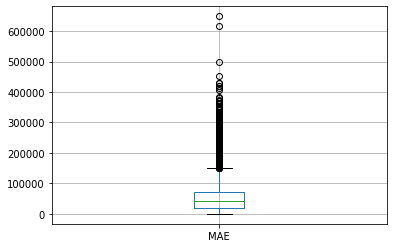

In [102]:
df_1.boxplot(column=['MAE'])

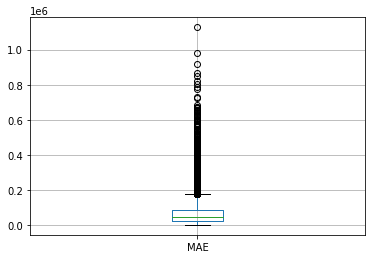

In [103]:
df_2.boxplot(column=['MAE'])

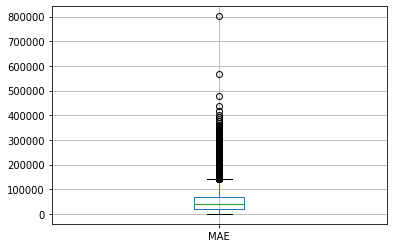

In [104]:
df_3.boxplot(column=['MAE'])

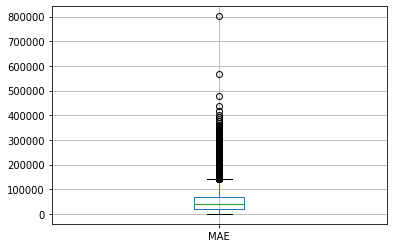

In [105]:
df_4.boxplot(column=['MAE'])

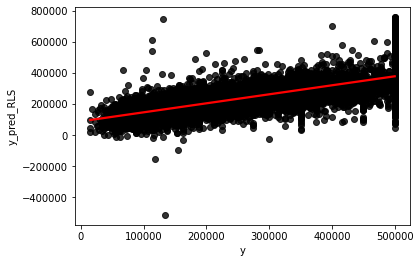

In [106]:
sns.regplot(x='y', y='y_pred_RLS', data=df_1,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

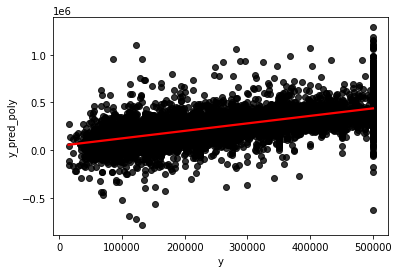

In [107]:
sns.regplot(x='y', y='y_pred_poly', data=df_2,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

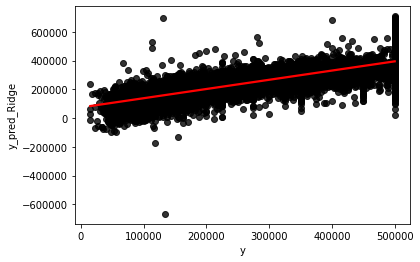

In [108]:
sns.regplot(x='y', y='y_pred_Ridge', data=df_3,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

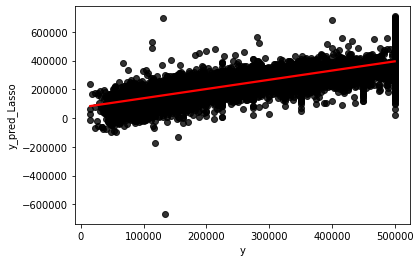

In [109]:
sns.regplot(x='y', y='y_pred_Lasso', data=df_4,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

###Conclusión

Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes? Agrega las conclusiones

Considero que el mejor de los métodos fue el que utilizó Lasso, ya que tiene un R2 de .70 en la prueva de validación (test). En los otros métodos en la prueba de validación se obtienen resultados menores. Por otra parte los errores son intermedios en el método Lasso, es decir, no son los menores, pero tampoco los peores. El mejor en ese sentido fue Ridge, con un valor de 53,886 en prueba y 79459 en validación. Por su parte Lasso obtuvo 59,809 en prueba y 64,593 en validación. Se utilizó una partición de 90% de entrenamiento y 10% de validación, no obstante, es probable que con más datos se obtengan mejores resultados. El resultado es staisfactorio, pero puede mejorar con el uso de otros métodos o de mayor información de las casas. 
Finalmente, es importante considerar que los datos originales parecen estar truncados en lugar de plasmar la realidad del costo de las casas con valores muy altos. Ello nos puede perjudicar en los modelos desarrollados. 

Ridge

Test 0.5553548075111567

Root Mean Squared Error: 53886.90897163569

Root Mean Squared Error: 79459.37965676631
******************************
Lasso

Test 0.7061636558872193

Root Mean Squared Error: 59809.29060746045

Root Mean Squared Error: 64593.84329790859

#Kmeans


Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [110]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [112]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [113]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [115]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

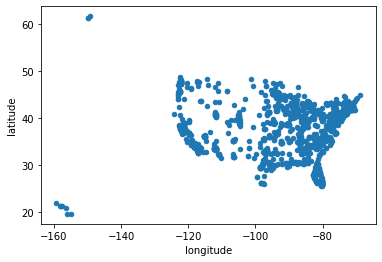

In [116]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [117]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [118]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [119]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [120]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [121]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [122]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

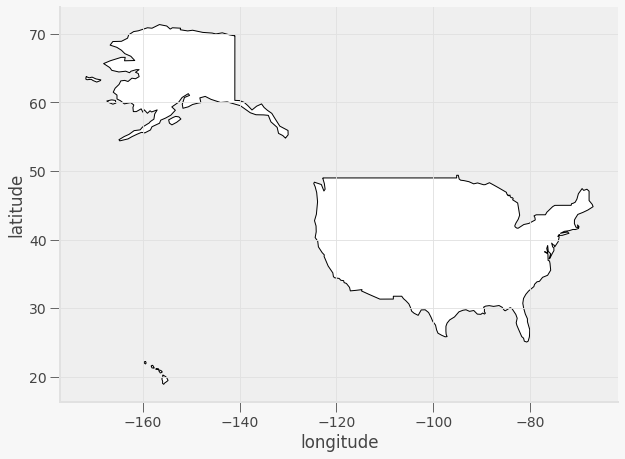

In [123]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

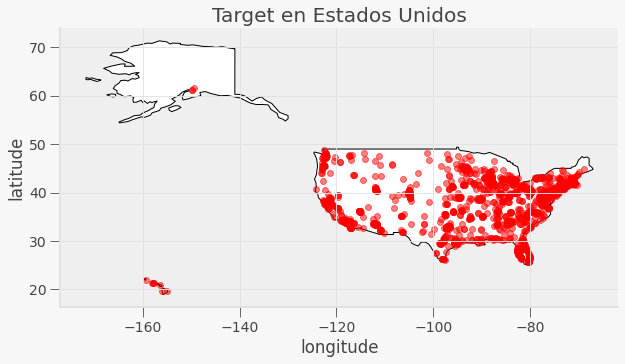

In [124]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [125]:
X=latlong
X

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422
...,...,...
1834,43.034293,-88.176840
1835,42.989604,-88.259806
1836,42.846799,-106.264166
1837,41.162019,-104.800048


In [126]:
X=np.array(X)

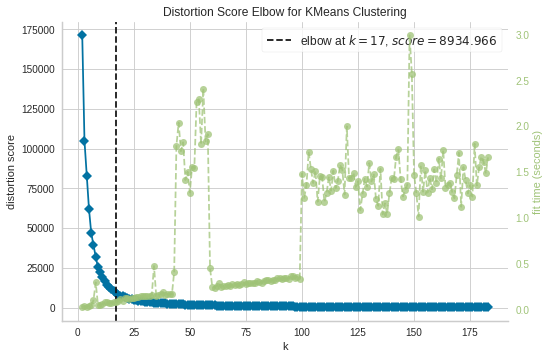

In [127]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,184))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [128]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=17)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

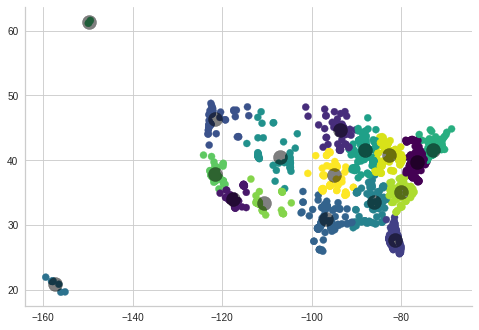

In [129]:
#tu codigo aquí
#X=latlong
plt.scatter(X[:,1],X[:,0], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

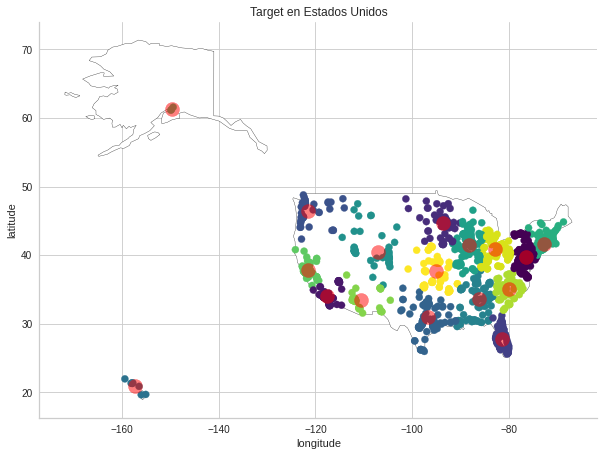

In [130]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
plt.scatter(X[:,1],X[:,0], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5);

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [131]:
d=kmeans.transform(X).round(2)
d=pd.DataFrame(d)
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,12.11,30.72,13.37,7.73,37.10,10.21,71.57,0.78,21.58,8.40,16.26,68.86,35.02,23.87,6.98,8.60,9.44
1,12.21,30.53,13.18,7.94,36.89,10.05,71.41,0.91,21.37,8.27,16.37,68.65,34.82,23.69,7.13,8.59,9.22
2,14.52,29.82,15.22,7.14,37.12,8.87,70.08,3.48,21.63,10.92,18.63,68.99,34.40,22.96,9.02,11.43,10.14
3,11.61,30.54,12.15,8.84,36.49,10.42,71.65,1.30,21.01,7.06,15.77,68.17,34.70,23.73,6.90,7.53,8.71
4,12.24,32.18,15.75,5.40,39.09,11.32,72.60,2.41,23.56,10.61,16.28,70.91,36.67,25.32,6.61,9.92,11.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,12.11,30.67,5.79,16.75,33.46,14.80,72.58,9.67,19.11,1.52,15.38,64.16,33.73,24.46,11.30,5.81,8.69
1835,12.18,30.58,5.72,16.74,33.39,14.72,72.49,9.65,19.02,1.48,15.46,64.09,33.65,24.36,11.33,5.87,8.59
1836,29.89,14.26,12.66,29.14,15.62,15.21,55.55,22.18,2.49,18.14,33.42,47.18,16.04,10.38,27.28,23.55,12.29
1837,28.30,14.55,11.61,27.02,17.48,12.98,56.27,20.17,2.41,16.63,31.94,49.19,17.03,9.70,25.43,22.00,10.30


In [132]:
distancias=d.min(axis=1)
distancias.describe()

count    1839.000000
mean        1.844334
std         1.199277
min         0.040000
25%         0.980000
50%         1.590000
75%         2.385000
max         8.370000
dtype: float64

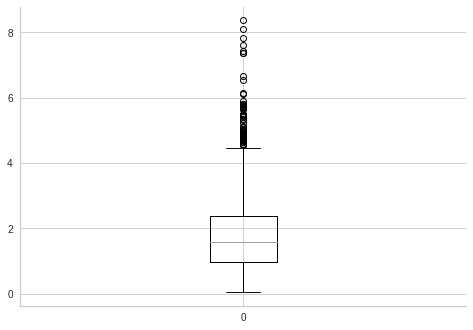

In [133]:
distancias=pd.DataFrame(distancias)
distancias.boxplot()

In [134]:
kmeans.inertia_

8898.737831106519

In [135]:
centros=pd.DataFrame(kmeans.cluster_centers_)
centros

,0,1
0,39.662849,-76.544109
1,34.077733,-117.508140
2,44.661791,-93.730153
3,27.742487,-81.349076
4,46.445732,-121.467081
5,30.974088,-96.758238
6,20.945428,-157.312251
7,33.586818,-86.110512
8,40.511698,-107.117614
9,41.515830,-88.170355


In [136]:
import pandas as pd
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

s = """Latitude   Longitude  
40.823291	-83.378371
34.077733	-117.508140
41.589639	-72.939654
31.199206	-96.865666
27.742487	-81.349076
40.477487	-107.032825
46.445732	-121.467081
20.945428	-157.312251
44.661565	-93.765816
38.160565	-93.642377
33.446608	-110.674579
35.134736	-80.092008
37.876577	-121.514437
33.535111	-86.200786
61.312645	-149.676793
39.668874	-76.897251
42.053570	-87.981487"""

bodega_df = pd.read_csv(io.StringIO(s), delim_whitespace=True)

def city_state_country(row):
    coord = f"{row['Latitude']}, {row['Longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

bodega_df = bodega_df.apply(city_state_country, axis=1)
print(bodega_df)

     Latitude   Longitude city           state        country
0   40.823291  -83.378371                 Ohio  United States
1   34.077733 -117.508140           California  United States
2   41.589639  -72.939654          Connecticut  United States
3   31.199206  -96.865666                Texas  United States
4   27.742487  -81.349076              Florida  United States
5   40.477487 -107.032825             Colorado  United States
6   46.445732 -121.467081           Washington  United States
7   20.945428 -157.312251                       United States
8   44.661565  -93.765816            Minnesota  United States
9   38.160565  -93.642377             Missouri  United States
10  33.446608 -110.674579              Arizona  United States
11  35.134736  -80.092008       North Carolina  United States
12  37.876577 -121.514437           California  United States
13  33.535111  -86.200786              Alabama  United States
14  61.312645 -149.676793               Alaska  United States
15  39.6

In [137]:
grupos = pd.DataFrame(kmeans.labels_)
grupos.value_counts()

0     203
10    198
9     195
5     159
15    153
1     140
7     121
3     117
2     101
14     83
12     80
16     79
8      73
4      69
13     57
6       8
11      3
dtype: int64

##Preguntas
Encuentra el numero ideal de almacenes, justifica tu respuesta:

Decidí dejar 17 almacenes, ya que es un número ideal obtenido en la gráfica de elbow. Estos almacenes están a un máximo de 8 unidades de distancia de cualquier punto.  


Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?
     Latitude   Longitude       city        state        country

0   38.771398  -76.951954                Maryland  United States

1   33.242026 -111.287803                 Arizona  United States

2   44.205905  -94.028525               Minnesota  United States

3   31.123280  -96.502198                   Texas  United States

4   27.715757  -81.332120                 Florida  United States

5   37.876577 -121.514437              California  United States

6   20.945428 -157.312251                Honolulu  United States

7   41.775999  -87.654789    Chicago     Illinois  United States

8   61.312645 -149.676793                  Alaska  United States

9   33.950352  -84.119449                 Georgia  United States

10  42.822953 -112.323018                   Idaho  United States

11  46.542981 -121.931856              Washington  United States

12  34.077733 -117.508140              California  United States

13  41.584891  -73.063300  Waterbury  Connecticut  United States

14  39.077673 -105.188208                Colorado  United States

15  37.345107  -92.770809                Missouri  United States

16  41.037527  -82.335915                    Ohio  United States

¿a cuantas tiendas va surtir?

En orden de mayor a menor, la bodega 15 es la que tendrá que surtir a más tiendas (214), y la 14 la que menos (3)

15    214

2     205

16    167

3     165

0     141

1     140

13    123

4     117

8     100

9      93

11     83

12     80

5      74

6      69

10     57

7       8

14      3

¿sabes a que distancia estará?

La tienda más lejana a una bodega se encuentra a 8 grados de distancia (1 grado es equivalente a 111km). El 50% de las tiendas están a poco más de 1 grado, por lo que tardarán (a una velocidad aproximada de 80km/hr) por lo que tardara poco menos de 2 horas en surtir más del 50% del total de las tiendas.


¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.


Realicé una gráfica de elbow en la que se puede obserbar el desempeño (inercia) de los centroides y la disminución de la misma al aumentar la cantidad de centros. Al llegar a los 10 larazón de cambio baja considerablemente, aunque la mayor flexión se encuentra entre el punto 17-19. También tomé en cuenta que si no se tenian bodegas en los estados que se encuentran fuera del país el tiempo de entrega será mucho mayor, por lo que se necesitaría una bodega en esos lugares en específico. No obstante, es ahí donde hay menos tiendas y los centros tienden a considerarlos como parte de un grupo de mayor fuera de la isla. Con estas consideraciónes opté por 17 grupos, de esta forma hay una bodega en cada isla, el tiempo de entrega de la mediana es de menos de dos horas y el máximo de 11.

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?

Geopandas: es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en Python. GeoPandas extiende los tipos de datos utilizados por los pandas para permitir operaciones espaciales en tipos geométricos.
Geopandas es muy útil cuando se trabaja con operaciones geométricas, además es de código abierto. Geopandas es muy útil en la visualización de datos geoespaciales, ya sea para ver mapas o incluso hacer personalizaciones de la visualización de los mapas.  

GDAL/OGR: librería fundamental para procesar formatos de datos vectoriales (OGR) y ráster (GDAL).
Muchos programas ya utilizan la librería de GDAL (PostGIS, R, Google Earth, entre otros), además la librería incluye varios programas de análisis, conversión, extracción y proyecciones. Dependiendo del proyecto en el que se trabaje esta librería podría ser la ideal. 

PyProj: Esta librería también es de uso básico ya que permite proyectar y transformar coordenadas entre diferentes sistemas. Por lo tanto ayuda bastante cuando se necesita hacer  operaciones con los datos. Además, ofrece funcionalidad para convertir las corrdenadas de un espacio referencial a otra con facilidad. 

GeoPy: facilita a los desarrolladores de Python localizar las coordenadas de direcciones, ciudades, países y puntos de referencia en todo el mundo utilizando geocodificadores de terceros y otras fuentes de datos. 
Geopy es eficiente porque es una librería diseñada para geo-codificar los datos y tomar las coordenadas de las ubicaciones utilizando geocodigo externos. Ayuda mucho a la limpieza de los datos. 

Cartopy: Esta librería permite dibujar mapas para que el análisis y la visualización de datos sea lo más intuitivo posible. Si se necesita realizar mapas y personalizarlos, cartopy es una buena opcion

¿Consideras importante que se grafique en un mapa?, ¿por qué?

Sí es importante. En casos como este, donde los datos anómalos en realidad sí forman parte del conjunto de datos, pero están en otra 'isla' debemos visualizarlo para saber que no se trata de un error, que hay factores a considerar (no solo la distancia, sino el medio de transporte que en este caso podría ser un barco o avión), la cantidad de inversión o incluso riesgo que se tiene al crear tiendas fuera del territorio (tierra) principal. 

Agrega las conclusiones

Si bien hay distintos tipos de bases de datos debemos considerar el tipo de datos y el objetivo del ejercicio que se está realizando. En este caso pudimos trabajar con datos georgráficos. Es importante tomar en cuenta que los datos son georgráficos, ya que hay distintos factores a considerar al realizar el ejercicio (como la distancia, el mar, el tipo de transporte, la inversión, el tamaño de las bodega, la catidad de productos que se vendne en dichas bodegas, el riesgo de las mismas, etc). Los Kmenas son una herramienta muy poderosa, ya que podemos obtener los resultados internos del modelo, la inercia, los labels, la distancia de cada tienda a cada uno de los centroides.
